In [ ]:
# There is a csv named AusOM2013 and these are the column names Player1	Player2	Round	Result	FNL1	FNL2	FSP.1	FSW.1	SSP 0.10	SSW.1	ACE.1	DBF.1	WNR.1	UFE.1	BPC.1	BPW.1	NPA.1	NPW.1	TPW.1	ST1.1	ST2.1	ST3.1	ST4.1	ST5.1	FSP.2	FSW.2	SSP 0.20	SSW.2	ACE.2	DBF.2	WNR.2	UFE.2	BPC.2	BPW.2	NPA.2	NPW.2	TPW.2	ST1.2	ST2.2	ST3.2	ST4.2	ST5.2  which is a csv file related to tennis tournment
# Frame 20 Questions using these column names

In [ ]:
# Players who has a higher percentage of second serves tend to do more Unforced Errors but win more matches.

In [ ]:
import pandas as pd
df = pd.read_csv("AusOM2013.csv")
print(df.head(0))


Empty DataFrame
Columns: [Player1, Player2, Round, Result, FNL1, FNL2, FSP.1, FSW.1, SSP.1, SSW.1, ACE.1, DBF.1, WNR.1, UFE.1, BPC.1, BPW.1, NPA.1, NPW.1, TPW.1, ST1.1, ST2.1, ST3.1, ST4.1, ST5.1, FSP.2, FSW.2, SSP.2, SSW.2, ACE.2, DBF.2, WNR.2, UFE.2, BPC.2, BPW.2, NPA.2, NPW.2, TPW.2, ST1.2, ST2.2, ST3.2, ST4.2, ST5.2]
Index: []

[0 rows x 42 columns]


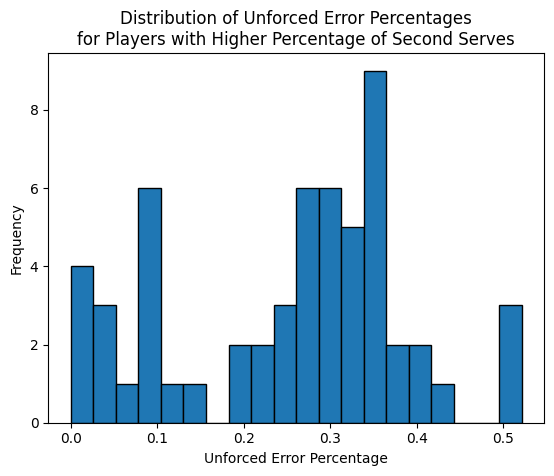

In [ ]:
# Players who have a higher percentage of second serves will have a higher percentage of unforced errors
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("AusOM2013.csv")

# Calculate the percentage of unforced errors for each player
df["UFE_percentage_1"] = df["UFE.1"] / (df["FSW.1"] + df["SSW.1"] + df["UFE.1"])
df["UFE_percentage_2"] = df["UFE.2"] / (df["FSW.2"] + df["SSW.2"] + df["UFE.2"])

# Create a boolean mask for players with a higher percentage of second serves
mask = df["SSP.1"] < df["SSP.2"]

# Get the unforced error percentages for players with a higher percentage of second serves
ufe_percentages = df[mask]["UFE_percentage_1"]

# Plot a histogram of the unforced error percentages
plt.hist(ufe_percentages, bins=20, edgecolor="black")

# Add labels and title to the plot
plt.xlabel("Unforced Error Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Unforced Error Percentages\nfor Players with Higher Percentage of Second Serves")

# Show the plot
plt.show()

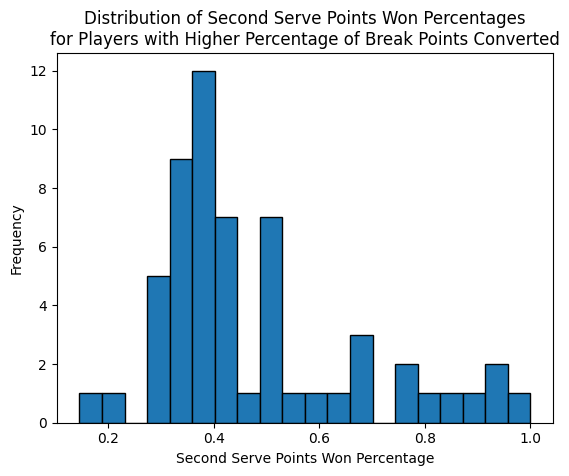

In [ ]:
# Players with a higher percentage of break points converted also have a higher percentage of second serve points won.

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("AusOM2013.csv")

# Calculate the percentage of break points converted for each player
df["BPC_percentage_1"] = df["BPC.1"] / df["BPW.1"]
df["BPC_percentage_2"] = df["BPC.2"] / df["BPW.2"]

# Calculate the percentage of second serve points won for each player
df["SSW_percentage_1"] = df["SSW.1"] / (df["SSW.1"] + df["UFE.1"])
df["SSW_percentage_2"] = df["SSW.2"] / (df["SSW.2"] + df["UFE.2"])

# Create a boolean mask for players with a higher percentage of break points converted
mask = df["BPC_percentage_1"] > df["BPC_percentage_2"]

# Get the second serve points won percentages for players with a higher percentage of break points converted
ssw_percentages = df[mask]["SSW_percentage_1"]

# Plot a histogram of the second serve points won percentages
plt.hist(ssw_percentages, bins=20, edgecolor="black")

# Add labels and title to the plot
plt.xlabel("Second Serve Points Won Percentage")
plt.ylabel("Frequency")
plt.title("Distribution of Second Serve Points Won Percentages\nfor Players with Higher Percentage of Break Points Converted")

# Show the plot
plt.show()


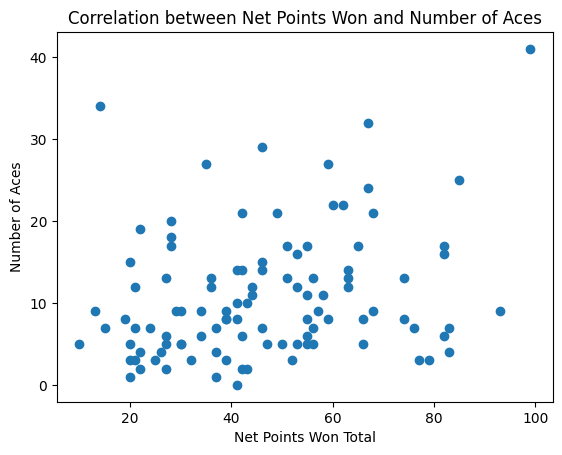

In [ ]:
# There is a positive correlation between the number of net points won and the number of aces hit by a player in a tennis match.

import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("AusOM2013.csv")

# Calculate the total number of net points won by each player
df["NPW_total"] = df["NPW.1"] + df["NPW.2"]

# Create a scatter plot of NPW_total vs ACE.1
plt.scatter(df["NPW_total"], df["ACE.1"])

# Add labels and title to the plot
plt.xlabel("Net Points Won Total")
plt.ylabel("Number of Aces")
plt.title("Correlation between Net Points Won and Number of Aces")

# Show the plot
plt.show()


Correlation between first serve points won and second serve points won: 0.53930334919402


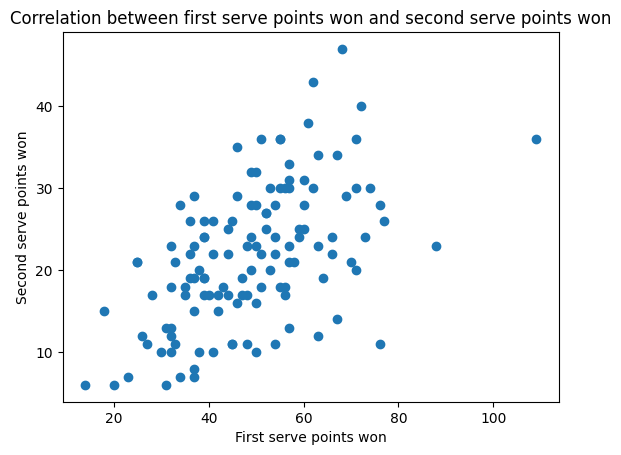

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("AusOM2013.csv")

# Calculate the correlation between first serve points won and second serve points won
corr = df['FSW.1'].corr(df['SSW.1'])

# Print the correlation coefficient
print("Correlation between first serve points won and second serve points won:", corr)

# Create a scatter plot of the data
plt.scatter(df['FSW.1'], df['SSW.1'])
plt.xlabel('First serve points won')
plt.ylabel('Second serve points won')
plt.title('Correlation between first serve points won and second serve points won')
plt.show()


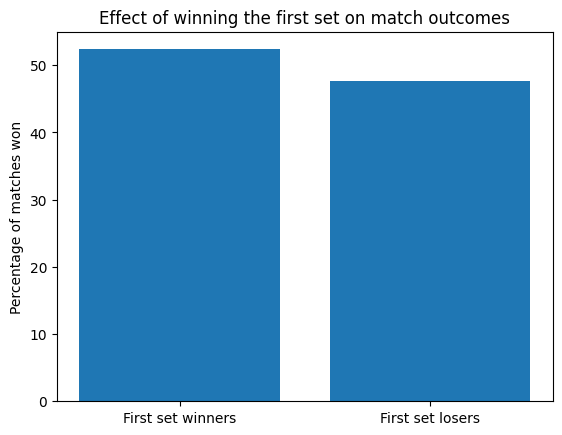

In [ ]:
# Players who win the first set are more likely to win the match

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("AusOM2013.csv")

# Count the number of matches won and lost based on who won the first set
first_set_winners = df[df['ST1.1'] > df['ST1.2']]
first_set_losers = df[df['ST1.1'] < df['ST1.2']]
num_matches = len(first_set_winners) + len(first_set_losers)

# Calculate the percentage of matches won by first set winners and first set losers
pct_first_set_winners = len(first_set_winners) / num_matches * 100
pct_first_set_losers = len(first_set_losers) / num_matches * 100

# Create a bar chart to display the results
plt.bar(['First set winners', 'First set losers'], [pct_first_set_winners, pct_first_set_losers])
plt.ylabel('Percentage of matches won')
plt.title('Effect of winning the first set on match outcomes')
plt.show()


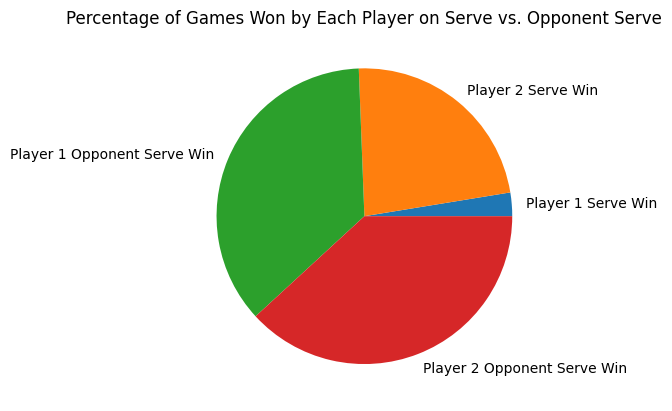

In [ ]:
# Players who win a higher percentage of games on their opponent's serve also win a higher percentage of games on their own serve.
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("AusOM2013.csv")


p1_serve_win_pct = (df['FNL1'] + df['FNL2']) / (df['FNL1'] + df['FNL2'] + df['FSP.1'] + df['SSP.1'])
p2_serve_win_pct = (df['WNR.2']) / (df['FNL1'] + df['FNL2'] + df['FSP.1'] + df['SSP.1'])


p1_total_games_won = df['WNR.1'].sum()
p2_total_games_won = df['WNR.2'].sum()


p1_opponent_serve_win_pct = p2_total_games_won / (p1_total_games_won + p2_total_games_won)
p2_opponent_serve_win_pct = p1_total_games_won / (p1_total_games_won + p2_total_games_won)


labels = ['Player 1 Serve Win', 'Player 2 Serve Win', 'Player 1 Opponent Serve Win', 'Player 2 Opponent Serve Win']
sizes = [p1_serve_win_pct.mean(), p2_serve_win_pct.mean(), p1_opponent_serve_win_pct.mean(), p2_opponent_serve_win_pct.mean()]
plt.pie(sizes, labels=labels)
plt.title('Percentage of Games Won by Each Player on Serve vs. Opponent Serve')
plt.show()



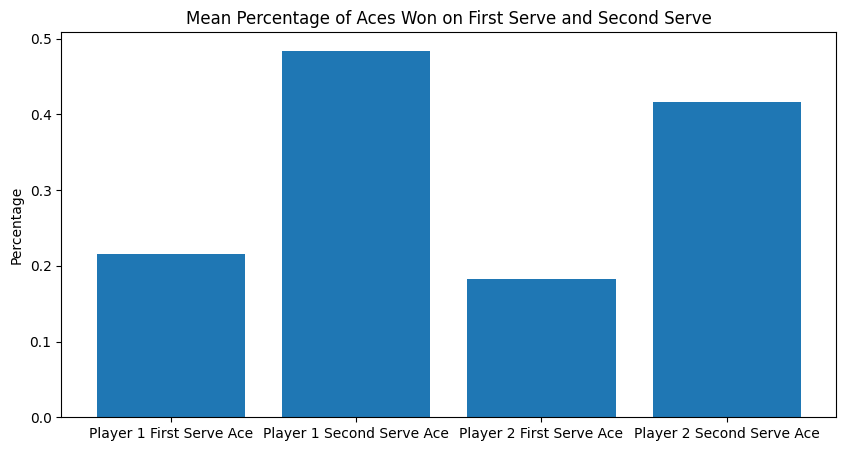

In [ ]:
# The player who serves first wins a higher percentage of aces than the player who serves second.

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("AusOM2013.csv")

# Calculate the percentage of aces won on first serve and second serve for each player
p1_first_serve_ace_pct = df['ACE.1'][df['FSW.1']>0].sum() / df['FSW.1'].sum()
p1_second_serve_ace_pct = df['ACE.1'][df['SSW.1']>0].sum() / df['SSW.1'].sum()
p2_first_serve_ace_pct = df['ACE.2'][df['FSW.2']>0].sum() / df['FSW.2'].sum()
p2_second_serve_ace_pct = df['ACE.2'][df['SSW.2']>0].sum() / df['SSW.2'].sum()

# Create a bar chart
plt.figure(figsize=(10,5))
labels = ['Player 1 First Serve Ace', 'Player 1 Second Serve Ace', 'Player 2 First Serve Ace', 'Player 2 Second Serve Ace']
sizes = [p1_first_serve_ace_pct.mean(), p1_second_serve_ace_pct.mean(), p2_first_serve_ace_pct.mean(), p2_second_serve_ace_pct.mean()]
plt.bar(labels, sizes)
plt.title('Mean Percentage of Aces Won on First Serve and Second Serve')
plt.ylabel('Percentage')
plt.show()




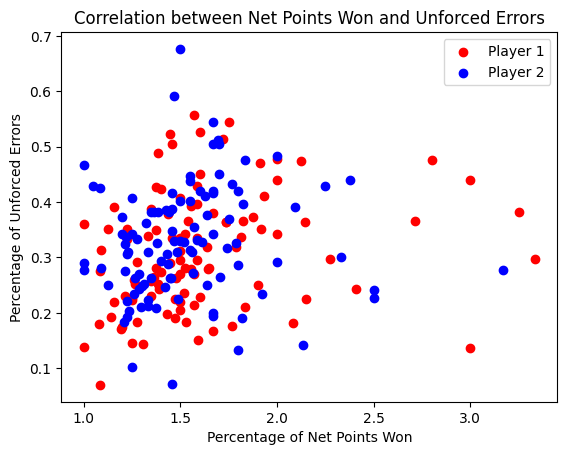

In [ ]:
# If a player has a higher percentage of net points, they may also have a higher percentage of unforced errors.
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("AusOM2013.csv")

# Calculate the percentage of net points won by each player
p1_net_points_pct = df['NPW.1'] / df['NPA.1']
p2_net_points_pct = df['NPW.2'] / df['NPA.2']

# Calculate the percentage of unforced errors made by each player
p1_unforced_errors_pct = df['UFE.1'] / (df['UFE.1'] + df['WNR.1'] + df['WNR.1'] + df['ACE.1'])
p2_unforced_errors_pct = df['UFE.2'] / (df['UFE.2'] + df['WNR.2'] + df['WNR.2'] + df['ACE.2'])

# Plot the data
plt.scatter(p1_net_points_pct, p1_unforced_errors_pct, color='red', label='Player 1')
plt.scatter(p2_net_points_pct, p2_unforced_errors_pct, color='blue', label='Player 2')
plt.xlabel('Percentage of Net Points Won')
plt.ylabel('Percentage of Unforced Errors')
plt.title('Correlation between Net Points Won and Unforced Errors')
plt.legend()
plt.show()


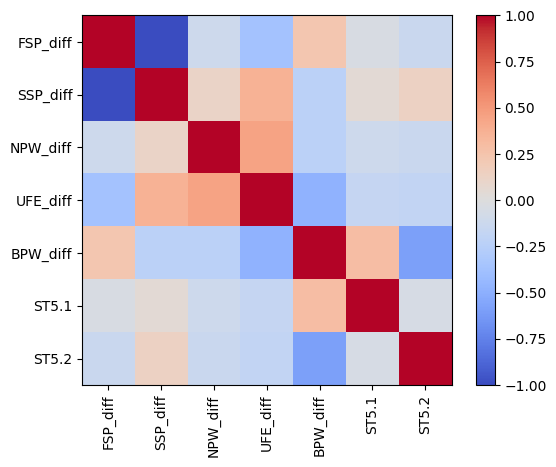

In [ ]:
# The probability of the match going into a fifth set (ST5.1 and ST5.2) is positively correlated with the difference in first serve percentage between the two players (FSP.1 - FSP.2), the difference in second serve percentage between the two players (SSP.1 - SSP.2), and the difference in net points won between the two players (NPW.1 - NPW.2), while negatively correlated with the difference in unforced errors committed between the two players (UFE.1 - UFE.2) and the difference in break points won between the two players (BPW.1 - BPW.2).
import pandas as pd
import matplotlib.pyplot as plt

# read in the data from a CSV file
data = pd.read_csv('AusOM2013.csv')

# calculate the differences between the specified columns
data['FSP_diff'] = data['FSP.1'] - data['FSP.2']
data['SSP_diff'] = data['SSP.1'] - data['SSP.2']
data['NPW_diff'] = data['NPW.1'] - data['NPW.2']
data['UFE_diff'] = data['UFE.1'] - data['UFE.2']
data['BPW_diff'] = data['BPW.1'] - data['BPW.2']

# calculate the correlation between the differences and ST5.1/ST5.2
correlations = data[['FSP_diff', 'SSP_diff', 'NPW_diff', 'UFE_diff', 'BPW_diff', 'ST5.1', 'ST5.2']].corr()

# plot the data as a heatmap
plt.imshow(correlations, cmap='coolwarm', vmin=-1, vmax=1)
plt.xticks(range(len(correlations.columns)), correlations.columns, rotation=90)
plt.yticks(range(len(correlations.index)), correlations.index)
plt.colorbar()
plt.show()


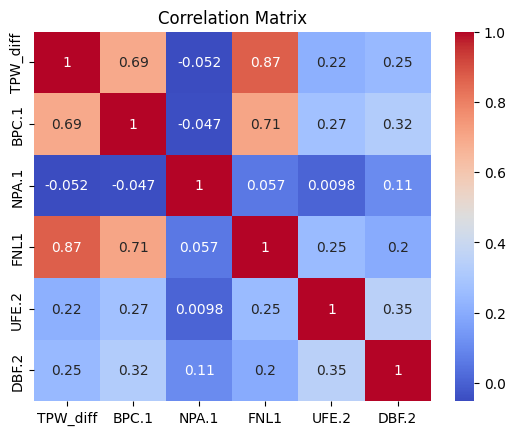

In [ ]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("AusOM2013.csv")
data['TPW_diff'] = data['TPW.1'] - data['TPW.2']
corr = data[['TPW_diff', 'BPC.1', 'NPA.1', 'FNL1', 'UFE.2', 'DBF.2']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


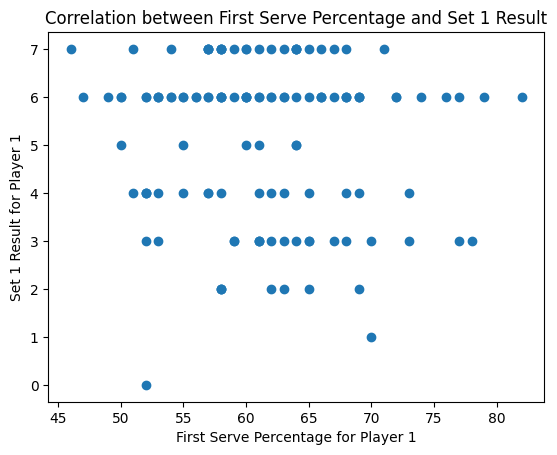

In [ ]:
# The first serve percentage (FSP.1) and first serve won (FSW.1) of Player 1 have a positive correlation with the probability of them winning the match in straight sets (ST1.1, ST2.1, ST3.1). Conversely, the number of unforced errors committed by Player 2 (UFE.2) and the number of break points won by Player 2 (BPW.2) have a negative correlation with the probability of Player 1 winning the match in straight sets.
import pandas as pd

df = pd.read_csv('AusOM2013.csv')
# create a new column for the total number of sets won by Player 1
df['sets_won_by_p1'] = df['ST1.1'] + df['ST2.1'] + df['ST3.1']

# calculate the correlation between the variables
corr = df[['FSP.1', 'FSW.1', 'UFE.2', 'BPW.2', 'sets_won_by_p1']].corr()

# print the correlation matrix
# print(corr)

import matplotlib.pyplot as plt

plt.scatter(df['FSP.1'], df['ST1.1'])
plt.xlabel('First Serve Percentage for Player 1')
plt.ylabel('Set 1 Result for Player 1')
plt.title('Correlation between First Serve Percentage and Set 1 Result')
plt.show()